In [1]:
# 0.85919 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_csv('Dataset/SmokerStatusPrediction/train.csv', encoding='utf-8')
test_df = pd.read_csv('Dataset/SmokerStatusPrediction/test.csv', encoding='utf-8')
train_df.shape, test_df.shape

((159256, 24), (106171, 23))

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [5]:
train_df.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106171 entries, 0 to 106170
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   106171 non-null  int64  
 1   age                  106171 non-null  int64  
 2   height(cm)           106171 non-null  int64  
 3   weight(kg)           106171 non-null  int64  
 4   waist(cm)            106171 non-null  float64
 5   eyesight(left)       106171 non-null  float64
 6   eyesight(right)      106171 non-null  float64
 7   hearing(left)        106171 non-null  int64  
 8   hearing(right)       106171 non-null  int64  
 9   systolic             106171 non-null  int64  
 10  relaxation           106171 non-null  int64  
 11  fasting blood sugar  106171 non-null  int64  
 12  Cholesterol          106171 non-null  int64  
 13  triglyceride         106171 non-null  int64  
 14  HDL                  106171 non-null  int64  
 15  LDL              

In [7]:
test_df.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
count,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,...,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000
mean,212341.000000,44.426538,165.221322,67.125618,82.999892,1.004776,0.999483,1.024216,1.023980,122.475403,...,127.406203,55.922286,114.597404,14.793354,1.072798,0.892463,25.559616,26.565427,36.086888,0.195458
std,30649.072052,11.897138,8.837065,12.586569,8.946584,0.397690,0.385752,0.153719,0.152988,12.765542,...,66.352488,14.000552,26.943401,1.434296,0.340818,0.179927,9.504442,17.944195,30.928138,0.396555
min,159256.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,8.000000,18.000000,1.000000,5.000000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000
25%,185798.500000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,...,77.000000,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000
50%,212341.000000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,...,114.000000,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000
75%,238883.500000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,164.000000,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,33.000000,44.000000,0.000000
max,265426.000000,85.000000,190.000000,130.000000,127.700000,9.900000,9.900000,2.000000,2.000000,213.000000,...,548.000000,148.000000,1220.000000,21.100000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000


In [9]:
# Check for missing values and duplicated values in train_df
print(train_df.isnull().sum())
print(train_df.duplicated().sum())

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64
0


In [10]:
# Check for missing values and duplicated values in test_df
print(test_df.isnull().sum())
print(test_df.duplicated().sum())

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
dtype: int64
0


In [11]:
# Check features in train_df
# Prediction Target: 'smoking'
train_features = train_df.columns.drop('id').to_list()
train_features

['age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'hearing(left)',
 'hearing(right)',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'hemoglobin',
 'Urine protein',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp',
 'dental caries',
 'smoking']

In [12]:
# Check features in test_df
# No prediction target
test_features = test_df.columns.drop('id').to_list()
test_features

['age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'hearing(left)',
 'hearing(right)',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'hemoglobin',
 'Urine protein',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp',
 'dental caries']

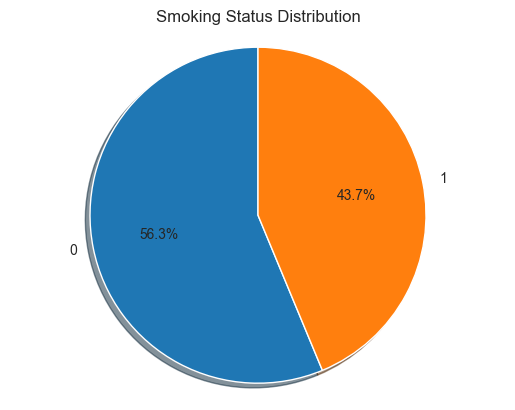

In [15]:
# EDA 
# Checking prediction target ('smoking') distribution with pie chart
smokingCounts = train_df['smoking'].value_counts()
labels = smokingCounts.index
sizes = smokingCounts.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Smoking Status Distribution')
plt.axis('equal')
plt.show()

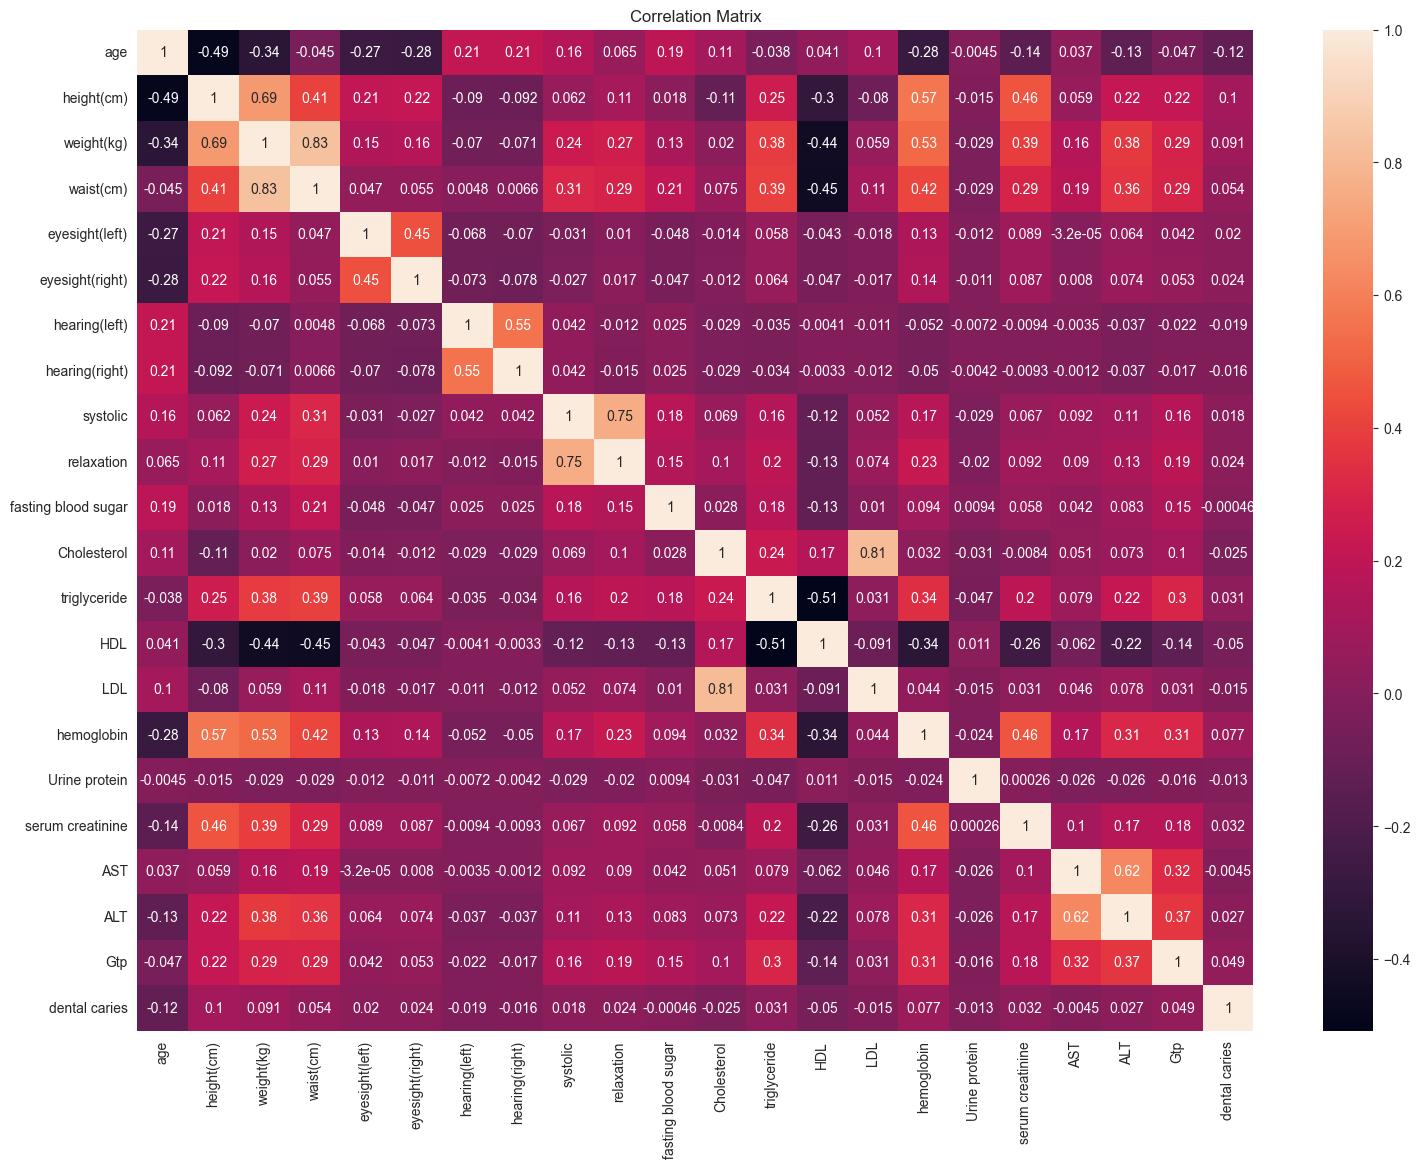

In [17]:
# Correlation analysis with heatmap
corrMatrix = train_df.drop(columns = ['id', 'smoking'], axis=1).corr()
plt.figure(figsize=(18, 13))
sns.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [18]:
# Select highly correlated featues
correlation_threshold = 0.5
highly_correlated_features = set()

# Iterate through the upper triangle of the correlation matrix to avoid duplicates
for i in range(len(corrMatrix.columns)):
    for j in range(i):
        if abs(corrMatrix.iloc[i, j]) > correlation_threshold:
            colname_i = corrMatrix.columns[i]
            colname_j = corrMatrix.columns[j]
            highly_correlated_features.add(colname_i)
            highly_correlated_features.add(colname_j)
print(highly_correlated_features)
print(len(highly_correlated_features))

{'hearing(left)', 'ALT', 'systolic', 'relaxation', 'HDL', 'height(cm)', 'weight(kg)', 'triglyceride', 'hearing(right)', 'LDL', 'waist(cm)', 'Cholesterol', 'hemoglobin', 'AST'}
14


In [26]:
X = train_df.drop(columns = ['id', 'smoking'], axis = 1)
#Y = train_df['smoking'].map({False: 0, True: 1})
Y = train_df['smoking']

test_cv = test_df.drop(columns = ['id'], axis = 1)

In [28]:
# Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
# Training
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
# Validation
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [29]:
# Ensemble
ens_cv_scores, ens_preds = list(), list()
#hill_ens_cv_scores, hill_ens_preds =  list(), list()

sk = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 1, random_state = 42)
for i, (train_idx, test_idx) in enumerate(sk.split(X, Y)):

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]

    print('----------------------------------------------------------')

    ########
    ## RF ##
    ########

    RF_md = RandomForestClassifier(n_estimators = 500,
                                   max_depth = 7,
                                   min_samples_split = 15,
                                   min_samples_leaf = 10).fit(X_train, Y_train)

    RF_pred = RF_md.predict_proba(X_test)[:, 1]
    RF_score = roc_auc_score(Y_test, RF_pred)

    print('Fold', i, '==> RF oof ROC-AUC score is ==>', RF_score)

    RF_pred_test = RF_md.predict_proba(test_cv)[:, 1]

    #################
    ## Extra Trees ##
    #################

    ET_md = ExtraTreesClassifier(n_estimators = 500,
                                 max_depth = 7,
                                 min_samples_split = 15,
                                 min_samples_leaf = 10).fit(X_train, Y_train)

    ET_pred = ET_md.predict_proba(X_test)[:, 1]
    ET_score = roc_auc_score(Y_test, ET_pred)

    print('Fold', i, '==> ET oof ROC-AUC score is ==>', ET_score)

    ET_pred_test = ET_md.predict_proba(test_cv)[:, 1]

    ##########################
    ## HistGradientBoosting ##
    ##########################

    hist_md = HistGradientBoostingClassifier(l2_regularization = 0.01,
                                             early_stopping = False,
                                             learning_rate = 0.01,
                                             max_iter = 500,
                                             max_depth = 5,
                                             max_bins = 255,
                                             min_samples_leaf = 15,
                                             max_leaf_nodes = 10).fit(X_train, Y_train)

    hist_pred = hist_md.predict_proba(X_test)[:, 1]
    hist_score = roc_auc_score(Y_test, hist_pred)

    print('Fold', i, '==> Hist oof ROC-AUC score is ==>', hist_score)

    hist_pred_test = hist_md.predict_proba(test_cv)[:, 1]

    #########
    ## XGB ##
    #########

    XGB_md = XGBClassifier(objective = 'binary:logistic',
                           tree_method = 'hist',
                           colsample_bytree = 0.7,
                           gamma = 2,
                           learning_rate = 0.01,
                           max_depth = 7,
                           min_child_weight = 10,
                           n_estimators = 500,
                           subsample = 0.7).fit(X_train, Y_train)

    xgb_pred = XGB_md.predict_proba(X_test)[:, 1]
    xgb_score = roc_auc_score(Y_test, xgb_pred)

    print('Fold', i, '==> XGB oof ROC-AUC score is ==>', xgb_score)

    xgb_pred_test = XGB_md.predict_proba(test_cv)[:, 1]

    ##############
    ## CatBoost ##
    ##############

    Cat_md = CatBoostClassifier(loss_function = 'Logloss',
                                iterations = 500,
                                learning_rate = 0.01,
                                depth = 7,
                                random_strength = 0.5,
                                bagging_temperature = 0.7,
                                border_count = 30,
                                l2_leaf_reg = 5,
                                verbose = False,
                                task_type = 'CPU').fit(X_train, Y_train)

    cat_pred = Cat_md.predict_proba(X_test)[:, 1]
    cat_score = roc_auc_score(Y_test, cat_pred)

    print('Fold', i, '==> CatBoost oof ROC-AUC score is ==>', cat_score)

    cat_pred_test = Cat_md.predict_proba(test_cv)[:, 1]

    ##############
    ## Ensemble ##
    ##############

    ens_pred_1 = (RF_pred + ET_pred + hist_pred + xgb_pred + cat_pred) / 5
    ens_pred_2 = (RF_pred_test + ET_pred_test + hist_pred_test + xgb_pred_test + cat_pred_test) / 5

    ens_score_fold = roc_auc_score(Y_test, ens_pred_1)
    ens_cv_scores.append(ens_score_fold)
    ens_preds.append(ens_pred_2)

    print('Fold', i, '==> Average Ensemble oof ROC-AUC score is ==>', ens_score_fold)

----------------------------------------------------------
Fold 0 ==> RF oof ROC-AUC score is ==> 0.8460891838162913
Fold 0 ==> ET oof ROC-AUC score is ==> 0.8193449817480825
Fold 0 ==> Hist oof ROC-AUC score is ==> 0.8538363793784094
Fold 0 ==> XGB oof ROC-AUC score is ==> 0.8615453231384069
Fold 0 ==> CatBoost oof ROC-AUC score is ==> 0.8575566815604363
Fold 0 ==> Average Ensemble oof ROC-AUC score is ==> 0.8564025105358681
----------------------------------------------------------
Fold 1 ==> RF oof ROC-AUC score is ==> 0.8448791291118085
Fold 1 ==> ET oof ROC-AUC score is ==> 0.8144273941542595
Fold 1 ==> Hist oof ROC-AUC score is ==> 0.8551085341813298
Fold 1 ==> XGB oof ROC-AUC score is ==> 0.8647614305196668
Fold 1 ==> CatBoost oof ROC-AUC score is ==> 0.8599885669168614
Fold 1 ==> Average Ensemble oof ROC-AUC score is ==> 0.857589301735983
----------------------------------------------------------
Fold 2 ==> RF oof ROC-AUC score is ==> 0.8482608928315082
Fold 2 ==> ET oof ROC-AU

In [30]:
np.mean(ens_cv_scores)

0.8570246545585125

In [31]:
ens_preds_test = pd.DataFrame(ens_preds).apply(np.mean, axis = 0)
ens_preds_test

0         0.597146
1         0.226322
2         0.556969
3         0.094963
4         0.569197
            ...   
106166    0.487912
106167    0.656761
106168    0.469766
106169    0.172058
106170    0.070173
Length: 106171, dtype: float64

In [32]:
# Generate submission file
submission_df = pd.read_csv(r"Dataset/SmokerStatusPrediction/sample_submission.csv", encoding="utf8")
submission_df['smoking'] = ens_preds_test
submission_df

,id,smoking
0,159256,0.597146
1,159257,0.226322
2,159258,0.556969
3,159259,0.094963
4,159260,0.569197
...,...,...
106166,265422,0.487912
106167,265423,0.656761
106168,265424,0.469766
106169,265425,0.172058


In [33]:
submission_df.to_csv(r"Dataset/SmokerStatusPrediction/submission.csv", index=False)